# My orympic story

歴史を見ると、オリンピックは紀元前8世紀頃～393年頃の古代オリンピックと1896年～現在の近代オリンピックに分けられる。

前者は宗教的な意味合いが強く、後者はエンターテイメントとしての要素が強い。

今回は近代オリンピックに焦点を当てたいと思う。

詳しく調べてみると、近代オリンピックはさらに細分化することができる。

1986年のアテネでは種目のほとんどが古代にもあった「走る・投げる・組む」といった身体能力を競うものだったそうだ。

そこから1896~1940年代になると綱引き、文学や建築、絵画といった芸術競技が追加され、試行錯誤の跡が見れる。古代と、近代との間で揺れ動いていた時期であると推測できる。

1980年代以降：ここからデータの傾向が劇的に変わる。球技（テニス、卓球）の再導入、冬の種目、そして近年ではスケートボードのような、古代ギリシャ人が想像もできなかった道具を使うスポーツが主流派になっている。

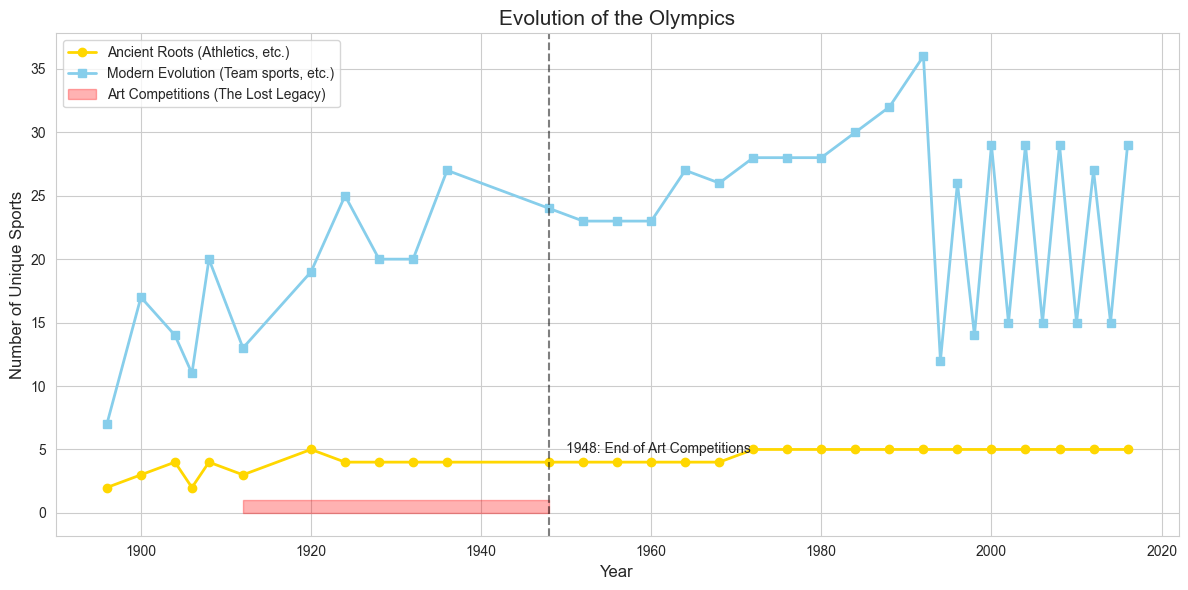

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rc('font',family='MS Gothic')
# データの読み込み
df = pd.read_csv('olympics.csv')

# 1. 芸術競技（Art Competitions）の抽出
art_sports = ['Art Competitions']
df_art = df[df['Sport'].isin(art_sports)]

# 2. 古代から続く伝統競技（陸上、レスリング、ボクシングなど）
ancient_roots = ['Athletics', 'Wrestling', 'Boxing', 'Equestrianism', 'Archery']
df_ancient = df[df['Sport'].isin(ancient_roots)]

# 3. 近現代の新興競技（球技、水泳、アーバンスポーツなど）
# ここでは「芸術でも古代ルーツでもないもの」をModernとして分類
df_modern = df[~df['Sport'].isin(art_sports + ancient_roots)]

# 年ごとの種目数を集計
def get_counts(data):
    return data.groupby('Year')['Sport'].nunique()

art_counts = get_counts(df_art)
ancient_counts = get_counts(df_ancient)
modern_counts = get_counts(df_modern)

# 可視化
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(ancient_counts.index, ancient_counts.values, label='Ancient Roots (Athletics, etc.)', marker='o', color='gold', linewidth=2)
plt.plot(modern_counts.index, modern_counts.values, label='Modern Evolution (Team sports, etc.)', marker='s', color='skyblue', linewidth=2)
plt.fill_between(art_counts.index, art_counts.values, color='red', alpha=0.3, label='Art Competitions (The Lost Legacy)')

# 1948年の芸術競技終了ライン
plt.axvline(x=1948, color='black', linestyle='--', alpha=0.5)
plt.text(1950, 5, '1948: End of Art Competitions', fontsize=10, verticalalignment='center')

plt.title('Evolution of the Olympics', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Sports', fontsize=12)
plt.legend()
plt.tight_layout()

plt.show()

赤いエリアは芸術競技を表している。1948年を境に、グラフから「芸術」が完全に姿を消す。これはクーベルタン男爵が夢見た「文武両道」の理想が、現実のプロフェッショナリズムの壁にぶつかり、終わりを迎えたことがわかる。

青いライン（現代スポーツ）の急上昇： 芸術が消えた後、代わって「Modern Evolution（青）」の種目数が指数関数的に伸びているのがわかる。

結論： オリンピックは「芸術」を競うことを諦める代わりに、世界中のあらゆる「遊び」や「文化」をスポーツとして取り込むことで、巨大なエンターテインメントへと変化していったことがわかる。